In [1]:
from datetime import timedelta

In [2]:
from dateutil.parser import parse

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

In [5]:
data1 = pd.read_csv("data1.csv") #초반
data1.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,270.000000,270.000000,270.000000,270.000000
mean,3.835594,0.000439,2.811833,0.002478
std,0.028272,0.003589,18.686990,0.016470
min,3.730800,0.000000,0.000000,0.000000
25%,3.818000,0.000000,0.000000,0.000000
50%,3.844900,0.000000,0.000000,0.000000
75%,3.857450,0.000000,0.000000,0.000000
max,3.867800,0.030100,127.662000,0.114000


In [6]:
data2 = pd.read_csv("data2.csv") #중반
data2.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,166.000000,166.000000,166.000000,166.000000
mean,3.891724,0.001087,6421.010699,0.004060
std,0.032776,0.005561,52180.347360,0.020677
min,3.722200,0.000000,0.000000,0.000000
25%,3.897700,0.000000,0.000000,0.000000
50%,3.898400,0.000000,0.000000,0.000000
75%,3.898800,0.000000,0.000000,0.000000
max,3.899000,0.030100,647645.937000,0.112000


In [7]:
data3 = pd.read_csv("data3.csv") #후반
data3.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,130.000000,130.000000,130.000000,130.000000
mean,3.881165,0.001150,18907.774915,0.004277
std,0.037032,0.005729,98630.459572,0.021309
min,3.695700,0.000000,0.000000,0.000000
25%,3.888300,0.000000,0.000000,0.000000
50%,3.889150,0.000000,0.000000,0.000000
75%,3.889500,0.000000,0.000000,0.000000
max,3.889900,0.030000,646036.437000,0.111000


In [8]:
data2 = data2.iloc[:, :3] #.values

In [9]:
date_=[] #replace korean to english

for i in data1['Time'].values:
    i = i.replace("오전", "AM")
    i = i.replace("오후", "PM")
    date_.append(i)

In [10]:
date__=[] #split blank

for i in date_:
    date__.append(i.split(" "))

In [11]:
date___=[] #switch index

for i in date__:
    tmp = i[1]
    i[1] = i[2]
    i[2] = tmp
    date___.append(i)

In [12]:
parsing_date=[]

for i in tqdm(date___):
    #print('parsing: ', i, "=", (" ").join(i))
    dt = parse((" ").join(i)) #list to string
    #print(dt)
    #print()
    parsing_date.append(dt)

100%|██████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 9648.24it/s]


### 찾아야 하는 것들
1. 통신 직전의 전압 인덱스 
    - 전류가 0.020 < current (<= 0.035)인 인덱스의 전 인덱스
    ```
    comm = np.where(data['Current(A)'] > 0.020)[0] #통신
    # 0.020 초과인 인덱스
    ```
    
    - 전압 확인 (기준 전압)
    ```
        
    ```
    - 인덱스 확인
    ```
    criteria = comm - 1 #통신 직전 전압의 인덱스를 알기 위함
    ```
2. 통신 전압
    - 전류가 0.020 < current인 인덱스
    ```
    comm = np.where(data['Current(A)'] > 0.020)[0]
    ```
    - 전압 확인 (최저 전압 확인)
    ```
    comm = np.delete(comm, np.where(data['Voltage(V)'] < 2.000))
    
    comm = np.delete(np.where(data1['Current(A)'] > 0.020)[0], np.where(data1['Voltage(V)'] < 2.000))
    ```
    - 인덱스 확인
    - 통신 전압이 기준 전압의 얼마만큼을 소비했는가
    ```
    #pre 기준 전압의 인덱스
    
    ```
3. 통신 후 전압
    - (기준 전압 - 현재 전압) * 100
    - 전압 회복률 
    - 회복 기준이 0.5인 곳이 회복 시간이라고 하자면 시간
    
4. 전압 회복 시간
    - 그래프를 그려서 확인해볼 것
    ```
    #시간과 전압, 전압 회복률 저장
    ```

In [13]:
comm_ = np.delete(np.where(data2['Current(A)'] > 0.020)[0], np.where(data2['Voltage(V)'] < 2.000))

### 첫 통신 모드 인덱스를 알아야 함

In [14]:
comm = np.array([comm_[0]])

for idx in range(int(len(comm_)-1)):
#     print("index", idx, "i", comm_[idx])
#     print("index+1", idx+1, "i", comm_[idx+1])
    if comm_[idx]+1 != comm_[idx+1]:
#         print("index+1", idx+1, "i", comm_[idx+1])
#         print(comm)
        comm = np.append(comm, np.array(comm_[idx+1]))
#         print(comm)

In [15]:
comm

array([ 47, 131], dtype=int64)

### 기준 전압 = 통신 시작 인덱스 - 1

In [16]:
criteria = comm - 1

In [17]:
criteria

array([ 46, 130], dtype=int64)

### 전압 회복률

In [64]:
c = np.array([[1,2]])

In [66]:
c= np.append(c, [[1,2]], axis=0)

In [88]:
d=[[1,2,3]]

In [96]:
np.append(c, np.min(d), axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

### np.empty()로 생성하게 되면 쓰레기 값이 들어간다. *주의*

In [18]:
recovery_time=np.zeros((1,2)) #시간은 통신 전, 회복(crit) 시간
recovery_rate=np.zeros((1,2)) #통신(최대), crit(0.5 or smaller)
recovery_volt=np.zeros((1,3)) #통신전, 통신(최소), 회복

crit = 0.50

for idx, i in enumerate(tqdm(criteria)): #기준 전압
    r = np.array([])
    v = np.array([])
    for j in range(int(len(data2['Voltage(V)']))):
#         print("current", j+i, "next", comm[idx+1])

        rate = (data2['Voltage(V)'][i] - data2['Voltage(V)'][j+i+1]) * 100 #(기준전압 - 현재전압)*100
        r = np.append(r, np.array([rate]))
        v = np.append(v, np.array([data2['Voltage(V)'][j+i+1]]))
                
        if rate <= crit: #회복 전압
            recovery_rate = np.append(recovery_rate, np.array([np.max(r), rate]).reshape(1,2), axis=0)
            
            recovery_time = np.append(recovery_time, np.array([parsing_date[i], parsing_date[i+j]]).reshape(1,2), axis=0)
            
            recovery_volt = np.append(recovery_volt, np.array([data2['Voltage(V)'][i], np.min(v), data2['Voltage(V)'][j+i+1]]).reshape(1,3), axis=0)
            break
        
recovery_rate = np.delete(recovery_rate, 0, 0)
recovery_time = np.delete(recovery_time, 0, 0)
recovery_volt = np.delete(recovery_volt, 0, 0)

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2001.58it/s]


In [19]:
recovery_rate

array([[17.68,  0.47],
       [17.67,  0.47]])

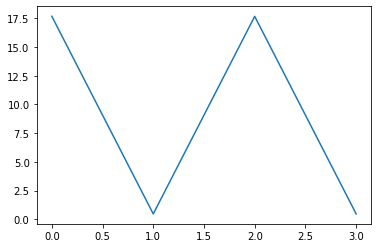

In [20]:
plt.plot(recovery_rate.flatten())

In [21]:
recovery_time

array([[datetime.datetime(2021, 9, 24, 16, 28, 43),
        datetime.datetime(2021, 9, 24, 16, 28, 44)],
       [datetime.datetime(2021, 9, 24, 16, 29, 2),
        datetime.datetime(2021, 9, 24, 16, 29, 3)]], dtype=object)

In [22]:
recovery_time[0]

array([datetime.datetime(2021, 9, 24, 16, 28, 43),
       datetime.datetime(2021, 9, 24, 16, 28, 44)], dtype=object)

In [23]:
str(recovery_time[0][1] - recovery_time[0][0])

'0:00:01'

In [24]:
re_time = []

for i in recovery_time:
    re_time.append(str(i[1] - i[0]))

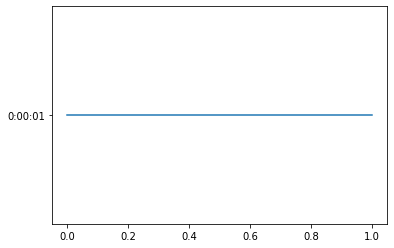

In [25]:
plt.plot(re_time)

In [26]:
recovery_volt

array([[3.899 , 3.7222, 3.8943],
       [3.899 , 3.7223, 3.8943]])

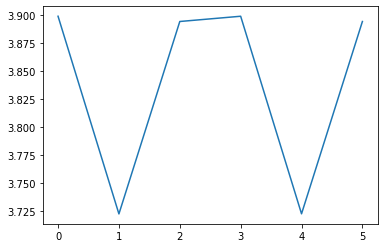

In [27]:
plt.plot(recovery_volt.flatten())